In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ddos-data.csv")
df.head()

,No.,Time,Source,Source_Port,MAC,Destination,Protocol,Length,Flags,Info
0,1,0.000000,192.168.0.107,59199.0,IntelCor_e0:2d:d3,192.168.0.255,UDP,305,NaN,59199 > 54915 Len=263
1,2,0.102253,192.168.0.107,54915.0,IntelCor_e0:2d:d3,192.168.0.255,UDP,305,NaN,54915 > 54915 Len=263
2,3,0.244179,192.168.0.100,61098.0,Apple_56:69:c0,192.168.0.2,DNS,81,NaN,Standard query 0x4bf7 A p68-caldav.icloud.com
3,4,0.305297,IntelCor_6c:2f:50,NaN,IntelCor_6c:2f:50,Broadcast,ARP,42,NaN,Who has 192.168.0.2? Tell 192.168.0.106
4,5,0.308302,192.168.0.2,61098.0,D-LinkIn_12:86:d8,192.168.0.100,ICMP,109,NaN,Destination unreachable (Port unreachable)


In [3]:
# 1. Number of records
print(df.shape[0])

117333


In [4]:
# 2.Duration time
index = df.last_valid_index()
last = df.loc[index,['Time']].values[0]
print(last)

71.87289100000001


In [5]:
# 3.Not part of attack three examples
df[(~df.Destination.duplicated(keep = 'first')) & (df.Destination != '192.168.0.100')][0:3]

,No.,Time,Source,Source_Port,MAC,Destination,Protocol,Length,Flags,Info
0,1,0.000000,192.168.0.107,59199.0,IntelCor_e0:2d:d3,192.168.0.255,UDP,305,NaN,59199 > 54915 Len=263
2,3,0.244179,192.168.0.100,61098.0,Apple_56:69:c0,192.168.0.2,DNS,81,NaN,Standard query 0x4bf7 A p68-caldav.icloud.com
3,4,0.305297,IntelCor_6c:2f:50,NaN,IntelCor_6c:2f:50,Broadcast,ARP,42,NaN,Who has 192.168.0.2? Tell 192.168.0.106


In [6]:
# 4. Characteristic


In [70]:
# 5.fillter for the attack
df[(df.Destination == '192.168.0.100') & (df.Source != '192.168.0.2')]

,No.,Time,Source,Source_Port,MAC,Destination,Protocol,Length,Flags,Info
128,129,19.975082,192.168.0.112,33600.0,IntelCor_b9:d8:a9,192.168.0.100,TCP,66,0x002,33600 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
130,131,19.977576,192.168.0.112,33600.0,IntelCor_b9:d8:a9,192.168.0.100,TCP,54,0x010,33600 > 80 [ACK] Seq=1 Ack=1 Win=65536 Len=0
132,133,19.994433,192.168.0.112,33600.0,IntelCor_b9:d8:a9,192.168.0.100,TCP,80,0x018,"33600 > 80 [PSH, ACK] Seq=1 Ack=1 Win=65536 ..."
136,137,19.997342,192.168.0.112,33600.0,IntelCor_b9:d8:a9,192.168.0.100,TCP,54,0x010,33600 > 80 [ACK] Seq=27 Ack=408 Win=65280 Len=0
137,138,20.011530,192.168.0.112,33600.0,IntelCor_b9:d8:a9,192.168.0.100,TCP,80,0x018,"33600 > 80 [PSH, ACK] Seq=27 Ack=408 Win=652..."
...,...,...,...,...,...,...,...,...,...,...
117313,117314,71.852104,192.168.0.121,64483.0,IntelCor_89:d8:c5,192.168.0.100,TCP,66,0x002,64483 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
117314,117315,71.852105,192.168.0.121,64462.0,IntelCor_89:d8:c5,192.168.0.100,TCP,66,0x002,64462 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
117315,117316,71.852106,192.168.0.121,64484.0,IntelCor_89:d8:c5,192.168.0.100,TCP,66,0x002,64484 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
117316,117317,71.852107,192.168.0.121,64463.0,IntelCor_89:d8:c5,192.168.0.100,TCP,66,0x002,64463 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...


In [8]:
# 7. Number of records part of the attack
df[df.Destination == '192.168.0.100'].count()[0]

67205

In [68]:
# 8. Number of unique source IP adresses performed in the attack
df_attack = df[(df.Destination == '192.168.0.100') & (df.Source != '192.168.0.2')]
l = ~df_attack['Source'].duplicated(keep = 'first')
df_attack[l].count()[0]

17

In [ ]:
# 9. top 3 source IP addresses sent most packets 
import numpy as np
df_attack.pivot_table(index=['Source'],aggfunc=[np.size])['size','Flags'].sort_values(ascending = False)[0:3]

In [ ]:
# 10. Distribution of vendors
df_attack[(~df_attack.MAC.duplicated(keep = 'first'))]['MAC']

In [ ]:
# 11. source port(s) involved in the attack
df_attack['Source_Port']

The rate peak of the attack in Mbits/sec 1.3836746267961308


<IPython.core.display.Javascript object>


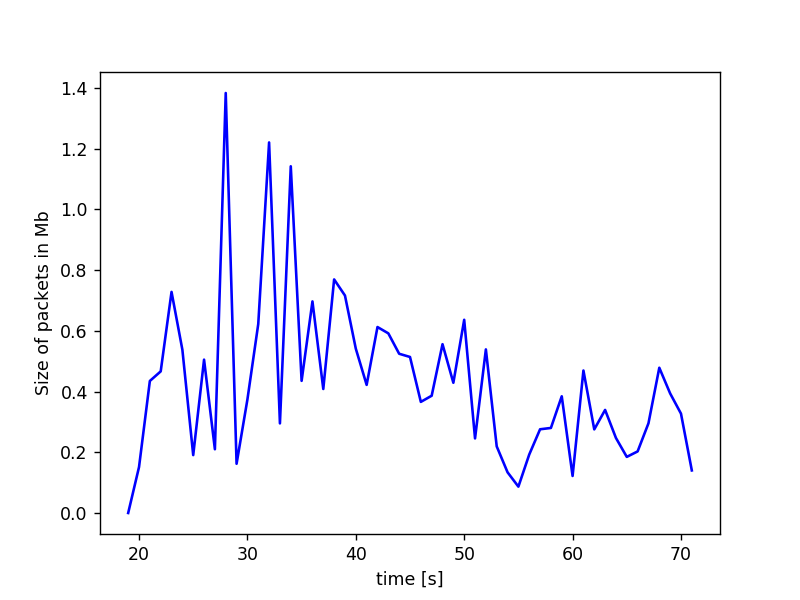

Text(0.5, 0, 'time [s]')

In [74]:
# 12 Data rate peak of attack
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#df_plot[['Time','Length']] = df_attack[['Time','Length']]#.apply(np.floor).reset_index()
df_plot = df_attack[['Time','Length']].copy()
df_plot['Time'] = df_plot['Time'].apply(lambda x : np.floor(x))
df_plot['Length'] = df_plot['Length'].apply(lambda x : x*0.00000095367432)
dx = df_plot.groupby(['Time'])['Length'].sum().reset_index().copy()
print( 'The rate peak of the attack in Mbits/sec',dx['Length'].max())
plt.plot(dx['Time'],dx['Length'], 'b-')
plt.ylabel('Size of packets [Mb]')
plt.xlabel('time [s]')

In [32]:
# 13 Distribution of TCP flag
#tcp-flag contains flag name in ASCII and hexadecimal format
#we read from the fille and add dictionary where flag name in hex is key and in ASCII is value
import csv
d = {}
with open('tcp-flags.csv','rt') as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=' ')
    for row in csv_reader:
        d[row[0]] = row[1]
dx = df_attack['Flags'].value_counts().reset_index()
#convert hex to ASCII
dx['index'] = dx['index'].apply(lambda x: d.get(x) )
print(dx)

,index,Flags
0,PSH-ACK,27339
1,SYN,25372
2,ACK,14160
3,RST,151
4,FIN-PSH-ACK,84
5,FIN-ACK,56
6,RST-ACK,15


packet distribution for packet total length bigger than 40 
     packet_length  total_length
0              66         14075
1              74         11189
2            1514          6737
3              78          5735
4             508          5264
5              92          4255
6              54          4234
7              80          4026
8            1418          1916
9              62          1050
10           1254          1003
11            534           850
12             76           620
13            590           320
14            144           309
15           1488           294
16            118           223
17            170           220
18            106           184
19            482           165
20            132           164
21            326           124
22            456           123
23            196           120
24            430           119
25            404           112
26            100           109
27            378           109
28         

<IPython.core.display.Javascript object>


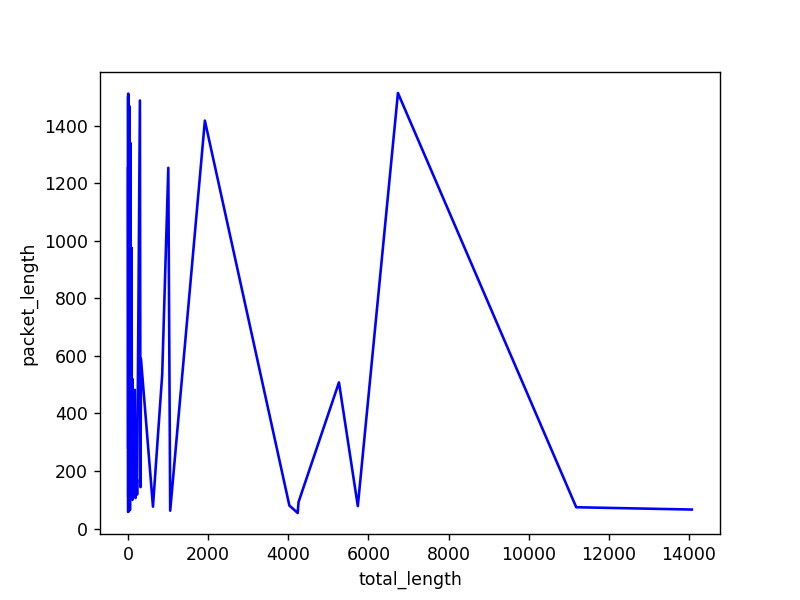

In [76]:
# 14 Distribution for the total length
dx = df_attack['Length'].value_counts().reset_index()
#dx = df_attack.groupby('Length')[''].filter(lambda x: len(x) >= 3)
#dx.groupby('index')['Length'].mask(lambda x : (x > 3))
dy = dx[dx.Length > 40]
#dx['Length'].filter(lambda x: len(x) > 2)
dx.columns = ['packet_length','total_length']
dy.columns = ['packet_length','total_length']
print('packet distribution for packet total length bigger than 40 \n', dy)
%matplotlib notebook
#s = lambda x : (((x-x.min())/float(x.max()-x.min())+1)*16)**2
#plt.scatter(dy['packet_length'],dy['total_length'],s=s(dy['total_length']))
plt.plot(dx['total_length'],dx['packet_length'], 'b-')
plt.ylabel('packet_length')
plt.xlabel('total_length')
plt.savefig('/home/robson/Desktop/temp/plot.png')